# Proyecto 1

## Continuación de Proyecto

Cristina Bautista - 161260

Abril Palencia - 18198 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
# from pandas_profiling import ProfileReport
import re


%matplotlib inline

In [2]:
df = pd.read_csv('dataset/final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 32 columns):
 #   Column                      Dtype
---  ------                      -----
 0   Unnamed: 0                  int64
 1   BIFLOW_DIRECTION            int64
 2   DIRECTION                   int64
 3   FIRST_SWITCHED              int64
 4   FLOW_DURATION_MILLISECONDS  int64
 5   FLOW_END_MILLISECONDS       int64
 6   FLOW_ID                     int64
 7   FLOW_START_MILLISECONDS     int64
 8   IN_BYTES                    int64
 9   IN_PKTS                     int64
 10  L4_DST_PORT                 int64
 11  L4_SRC_PORT                 int64
 12  LAST_SWITCHED               int64
 13  OOORDER_IN_PKTS             int64
 14  OOORDER_OUT_PKTS            int64
 15  OUT_BYTES                   int64
 16  OUT_PKTS                    int64
 17  PROTOCOL                    int64
 18  TCP_FLAGS                   int64
 19  TCP_WIN_MAX_IN              int64
 20  TCP_WIN_MAX_OUT        

In [4]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from collections import Counter

In [5]:
sorted(Counter(df['LABEL']).items())

[(0, 8574490), (1, 575486), (2, 218460), (3, 631564)]

0    8574490
3     631564
1     575486
2     218460
Name: LABEL, dtype: int64

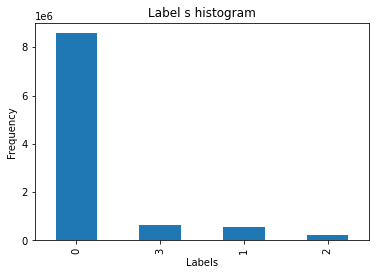

In [6]:
pd.value_counts(df['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df['LABEL'].value_counts()

In [7]:
X = df
y = df[['LABEL']]
X = X.drop(['LABEL'], axis=1)

In [8]:
y.value_counts()

LABEL
0        8574490
3         631564
1         575486
2         218460
dtype: int64

In [9]:
X.shape, y.shape

((10000000, 31), (10000000, 1))

In [10]:
ros = RandomOverSampler(random_state=5)
X_resample, y_resample = ros.fit_resample(X, y)

In [11]:
X_resample.shape, y_resample.shape

((34297960, 31), (34297960, 1))

In [12]:
#X_resample.drop(['LABEL'], axis=1)

In [13]:
X_resample

,Unnamed: 0,BIFLOW_DIRECTION,DIRECTION,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_ID,FLOW_START_MILLISECONDS,IN_BYTES,IN_PKTS,...,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
0,486885,1,0,1622437206,0,1622437206455,7549130,1622437206455,40,1,...,1024,0,0,0,0,0,0,0,1,7549130
1,9617043,1,0,1622440145,0,1622440145780,16679288,1622440145780,40,1,...,1024,0,0,0,0,0,0,0,1,16679288
2,601904,1,0,1622437231,0,1622437231644,7664149,1622437231643,40,1,...,1024,0,0,0,0,0,0,0,1,7664149
3,7965335,1,0,1622438512,27,1622438512243,15027580,1622438512215,73,1,...,0,0,0,0,0,0,0,0,1,15027580
4,26062581,1,0,1622451497,14,1622451497063,33124826,1622451497049,41,1,...,517,8,0,0,0,0,0,0,1,33124826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34297955,2290662,1,0,1616670232,0,1616670232320,4584230,1616670232319,44,1,...,1024,0,1460,0,0,0,0,0,1,4584230
34297956,1317953,1,0,1616666106,0,1616666106221,3611521,1616666106221,44,1,...,1024,0,1460,0,0,0,0,0,1,3611521
34297957,1077376,1,0,1616664591,0,1616664591994,3370944,1616664591993,44,1,...,1024,0,1460,0,0,0,0,0,1,3370944
34297958,1367892,1,0,1616666317,0,1616666317804,3661460,1616666317803,44,1,...,1024,0,1460,0,0,0,0,0,1,3661460


In [14]:
y_resample.value_counts()

LABEL
0        8574490
1        8574490
2        8574490
3        8574490
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_resample, y_resample, train_size = 0.55, 
                                                             test_size=0.45, random_state = 0)

In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size = 0.67, 
                                                             test_size=0.33, random_state = 0)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dTree = DecisionTreeClassifier()
dTree = dTree.fit(X_train, y_train)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
target_prediction = dTree.predict(X_val)
y_prob_pred = dTree.predict_proba(X_val)

In [22]:
accuracy_score(y_val, target_prediction)

0.9999975824000269

In [23]:
confusion_matrix(y_val, target_prediction)

array([[2585237,       3,       6,      16],
       [      0, 2584313,       0,       0],
       [      0,       0, 2585483,       0],
       [      0,       0,       0, 2585776]])

In [24]:
target_names=[0, 1, 2, 3]
target_names=list(map(str,target_names))

In [25]:
print(classification_report(y_val, target_prediction, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2585262
           1       1.00      1.00      1.00   2584313
           2       1.00      1.00      1.00   2585483
           3       1.00      1.00      1.00   2585776

    accuracy                           1.00  10340834
   macro avg       1.00      1.00      1.00  10340834
weighted avg       1.00      1.00      1.00  10340834



In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean, std

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)

In [28]:
n_scores = cross_val_score(dTree, y_val, target_prediction, scoring='accuracy', 
                           cv=cv, n_jobs=-1)

In [29]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 1.000 (0.000)


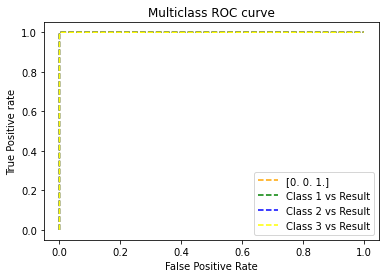

In [30]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, y_prob_pred[:, i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=fpr[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Result')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Result')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Result')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [31]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [32]:
lr.fit(X_train, y_train)

/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [33]:
target_predictionLR = lr.predict(X_val)
y_prob_predLR = lr.predict_proba(X_val)

In [34]:
accuracy_score(y_val, target_predictionLR)

0.25000517366394237

In [35]:
confusion_matrix(y_val, target_predictionLR)

array([[2585262,       0,       0,       0],
       [2584313,       0,       0,       0],
       [2585483,       0,       0,       0],
       [2585776,       0,       0,       0]])

In [36]:
print(classification_report(y_val, target_predictionLR, target_names=target_names))

/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40   2585262
           1       0.00      0.00      0.00   2584313
           2       0.00      0.00      0.00   2585483
           3       0.00      0.00      0.00   2585776

    accuracy                           0.25  10340834
   macro avg       0.06      0.25      0.10  10340834
weighted avg       0.06      0.25      0.10  10340834



/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)

In [38]:
n_scores = cross_val_score(lr, y_val, target_predictionLR, scoring='accuracy', 
                           cv=cv, n_jobs=-1)

/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)

In [39]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: nan (nan)


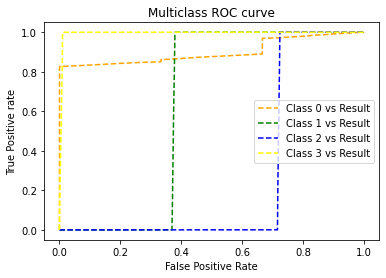

In [40]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, y_prob_predLR[:, i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Result')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Result')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Result')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Result')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')